TiDEpy tutorial
===============

We are delighted that you have decided to use TiDEpy, the python wrapper for the TiDE software. In this small tutorial we show the basic usage of the library.

Prerequisities
--------------

To be able to use and run TiDEpy, you need to compile the TiDE software itself.
Briefly this means that, you clone this git repository and run the following commands:

```bash
mkdir ~/TiDE
```
then switch to the TiDE git folder.

```bash
autoreconf --install
./configure --prefix=~/TiDE
make
make install
```

After these steps install tidepy itself:

```bash

pip install -e python/tidepy
```

Here the `-e` flag is optional: this way, if there was an update, a simple git pull would update the
package as well.

The `TIDE_LIB` environment variable should be pointing to the install dir/lib. e.g. 
```bash
export TIDE_LIB=$HOME/TiDE/lib
```

If it is not set, TiDEpy tries to load the shared library from the system library path (for more details
see libconfig), e.g. `LD_LIBRARY_PATH`.
If it can't find, it also tries to load it from the default build library (`TiDE/src/.libs`).

Getting started
---------------

We import tidepy, numpy and pyplot

In [9]:
import tidepy
import numpy as np
import matplotlib.pyplot as plt

### The parameters struct

We define our input parameters. TiDE is a modular software with many different options. These can be setup
through this class.

In [ ]:
p=tidepy.Parameters()


/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2192: RuntimeWarning: divide by zero encountered in ? (vectorized)
  outputs = ufunc(*inputs)
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2192: RuntimeWarning: overflow encountered in ? (vectorized)
  outputs = ufunc(*inputs)


The parameters are the following:

|        Name        | default | values | description |
| :----------------: | :-----: | :----: | :---------- |
| `bh_M6`            | 1 | `float` | mass of the black hole in 10^6 M_sun units |
| `star_mstar`       | 1 | `float` | mass of the star in M_sun units |
| `star_rstar`       | `'ms'` | `'ms','wd'` or `float` | radius of the star in R_sun units. ms MS: main sequence; wd WD: white dwarf |
| `star_politrop`    | `'default'` | `'default','4per3','5per3'` | politrop parameter of the star. default: setted based on the type of star. Can be $4/3$ or $5/3$|
| `bh_eta`           |  0.1 | `float` | radiative efficiency of the black hole |
| `eta_r`            | 0.0  | `float` | the efficiency of the reprocessing |
| `fout`             | `'bifout'`| `'bifout'` or `float` | fout value in [0;1] range. bifout - build in calculation.|
| `fv`               | 1| `float` |constant in the velocity of the wind. must be $\ge 1$ |
| `d`                | 0| `float` |distance. if 0, 1/(4 pi d^2) =1 will be used |
| `i`                | 0| `float` |inclination of the disk |
| `diff_timescale`   | `'default'`| `'default'` or `float` | diffusion timescale |
| `beta_fulldisrupt` | 1.85 | any `float`| the limit of full disruption |
| `N`                | 1000 | any `int`| Number of concentric rings used to calculate the accretion disk during numerical integration |
| `Mdotpeakcalc`     |  `"default"` | `'default' 'classic', 'L09_const', 'GR13'`|Mdotpeak calculation method |
| `Mdotfb_calc`      |  `"L09"` | `'default', 'L09', 'L09_cnst'` | Mdotfb calculation method: default is the classic method |
| `tmin_calc`        | `"default"` | `'default', 'with_rp','GR13'` | tmin calculation method |
| `tstart`           |  `"default"` | `'default'` or `'float'` $\ge t_{\rm min}$ | the starting time of the light curve |
| `tend`             | 100| `float` | the end of the light curve |
| `dt`               | 0.5| `float` | time step during light curve |
| `nu`               | 6.3e14 | `float` | The nominal frequency of the chosen photometric band. The default is the SDSS g band |


for further details, consult with the TiDE documentation, and the TiDE instrument paper.

----

Now let us create a supermassive blackhole with $M=1.5\times 10^6 M_\odot$, a main sequence star with $M_\star=1.25 M_\odot$. We follow the TDE from the $t_{\rm min}$ to 1000 days. The star is modelled through politrop approximation, the $\dot M_{\rm fb}$ is described by the Lodato & Rossi (2009) model. We use the corrigated $t_{\rm min}$ calculation method with $\beta_d=1.85$. $f_{\rm out}$ is taken to be time dependent. This will use the standard default options of the `Parameters` except for the masses.

**IMPORTANT: after the setup of the parameters, we have to call the `param_init()` method. This sets up the C++ backend for the calculation.**

In [12]:
p.bh_M6 = 1.5
p.star_mstar = 1.25
p.tend = 1000
p.param_init()

### Generating light curves

There is two main way to produce light curves:

- Standard light curve generation
- Diffused light curve generation

Both are done by the `Light_curve_of_tde` class. This class need the `Parameters` object for initialization.

#### Standard light curve generation

This can be done by the `light_curve` method. This method has no parameters. The return value is a tuple consisting of:

1. The input time array
2. The total frequency dependent luminosity
3. The wind part of the luminosity
4. The disk part of the luminosity

One can convert these to quasi-bolometric luminosity by multiplying with `p.nu`.


/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2192: RuntimeWarning: divide by zero encountered in ? (vectorized)
  outputs = ufunc(*inputs)
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2192: RuntimeWarning: overflow encountered in ? (vectorized)
  outputs = ufunc(*inputs)


Text(0, 0.5, '$\\nu L_\\nu$ [erg/s]')

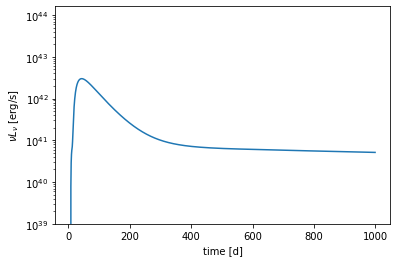

In [15]:
lc=tidepy.Light_curve_of_tde(p)

res=lc.light_curve()

plt.plot(res[0],res[1]*p.nu)
plt.yscale('log')
plt.ylim(bottom=1e39)
plt.xlabel('time [d]')
plt.ylabel(r'$\nu L_\nu$ [erg/s]')

#### The diffused lightcurve

In the beginning phase of the TDE, the wind material is so dense, that photons can escape slowly. This is modelled by diffusion. A diffused light curve can be generated through the `diffused_light_curve` method. The return values are:

1. The input time array
2. The total monocromatic luminosity.

/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2192: RuntimeWarning: divide by zero encountered in ? (vectorized)
  outputs = ufunc(*inputs)
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2192: RuntimeWarning: overflow encountered in ? (vectorized)
  outputs = ufunc(*inputs)
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2192: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


Text(0, 0.5, '$\\nu L_\\nu$ [erg/s]')

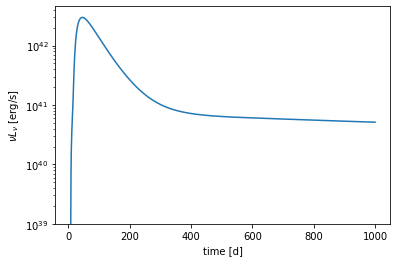

In [16]:
res2=lc.diffused_light_curve()

plt.plot(res2[0],res2[1]*p.nu)
plt.yscale('log')
plt.ylim(bottom=1e39)
plt.xlabel('time [d]')
plt.ylabel(r'$\nu L_\nu$ [erg/s]')

### Instantenous luminosity calculation

In the case one needs the luminosity in a single time point, we need to manually initialize the wind and disk components of the TDE. This is done by the `Wind_part_of_lc` and `Disk_part_of_lc`. These also needs the `Parameters` class for initialization. The corresponding methods are the `wind_luminosity_at_time` and `disk_luminosity_at_time` respectively. The total luminosity is the sum of these two.

To actually guess the time is currently tricky: if the default options are set, the `tstart_value` property of the `Paramaters` class holds the starting $t_{\rm min}$ value. Otherwise one can get the tmin from the C++ backend via the command:


In [20]:
tidepy.tide.lib.get_parameters_tmin(p.param)

7.501829978358198

The following example use the default tstart:

Text(0, 0.5, '$\\nu L_\\nu$ [erg/s]')

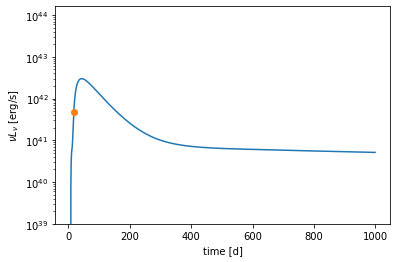

In [19]:
wind_component=tidepy.Wind_part_of_lc(p)
disk_component=tidepy.Disk_part_of_lc(p)

pt_w = wind_component.wind_luminosity_at_time(p.tstart_value+10)
pt_d = disk_component.disk_luminosity_at_time(p.tstart_value+10)

pt_tot=(pt_w+pt_d)*p.nu

plt.plot(res[0],res[1]*p.nu)
plt.plot(p.tstart_value+10,pt_tot,'o')
plt.yscale('log')
plt.ylim(bottom=1e39)
plt.xlabel('time [d]')
plt.ylabel(r'$\nu L_\nu$ [erg/s]')

Instanteonus diffused lightcurve is not implemented, because the diffusion needs previous luminosity values.


Advanced usage
--------------
In this last chapter we show an example implementation of the following problem:

We want to calculate different TDEs on a mass grid.

In [22]:
def light_curve_in_mass_range(masses):
    p = tidepy.Parameters()
    lc_calculator = tidepy.Light_curve_of_tde(p)
    results = []
    for M6 in masses:
        lc_calculator.PythonPar.bh_M6 = M6
        lc_calculator.PythonPar.param_init()
        results.append(lc_calculator.light_curve())
    return results

Now use a grid from $M_6 \in [0.1,1.5]$ with $0.1$ steps.

In [23]:
massgrid=np.arange(0.1,1.505,0.1)

allcurve = light_curve_in_mass_range(massgrid)

/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2192: RuntimeWarning: divide by zero encountered in ? (vectorized)
  outputs = ufunc(*inputs)
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2192: RuntimeWarning: overflow encountered in ? (vectorized)
  outputs = ufunc(*inputs)


And now plot them:

Text(0, 0.5, '$\\nu L_\\nu$ [erg/s]')

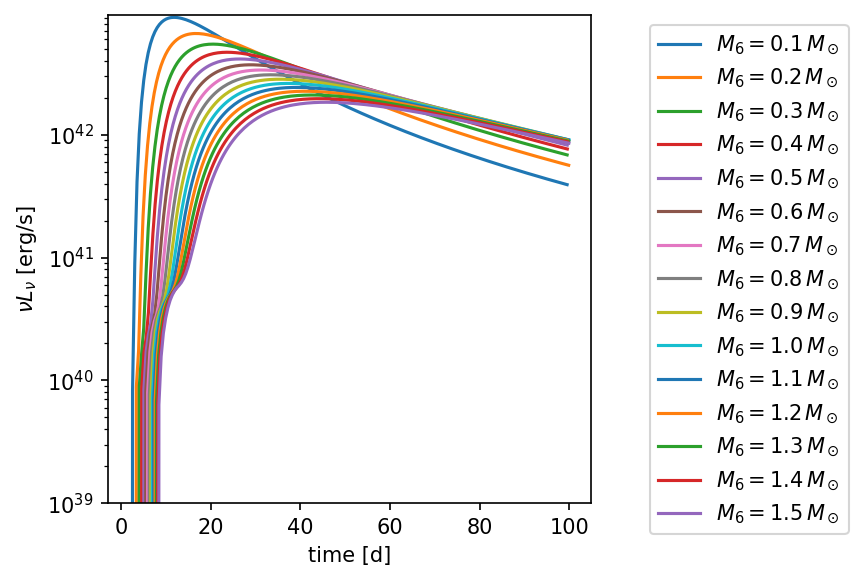

In [31]:
plt.figure(dpi=150,tight_layout=True)
for mass,crv in zip(massgrid,allcurve):
    plt.plot(crv[0],crv[1]*p.nu,label=f'$M_6={mass:.1f}\\,M_\\odot$')
plt.ylim(bottom=1e39)
plt.yscale('log')
plt.legend(bbox_to_anchor=[1.1,1])
plt.xlabel('time [d]')
plt.ylabel(r'$\nu L_\nu$ [erg/s]')